# Data Wrangling

# 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Data Science Problem](#1.2_Introduction)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load The Door Swing Data](#1.4_Load_The_Door_Swing_Data)
  * [1.5 Explore The Data](#1.5_Explore_The_Data)
    * [1.5.1 Looking At The Store Data](#1.5.1_Looking_At_The_Store_Data)
    * [1.5.2 Number Of Missing Values By Column](#1.5.2_Number_Of_Missing_Values_By_Column)
    * [1.5.3 Categorical Features](#1.5.3_Categorical_Features)
      * [1.5.3.1 Unique Store Names](#1.5.3.1_Unique_Store_Names)
      * [1.5.3.2 Number of Distinct Stores and States](#1.5.3.2_Number_of_Distinct_Stores_and_States)
      * [1.5.3.3 Distribution of Door Swings By State](#1.5.3.3_Distribution_of_Door_Swings_By_State)
    * [1.5.4 Numeric Features](#1.5.4_Numeric_Features)
      * [1.5.4.1 Numeric Data Summary](#1.5.4.1_Numeric_Data_Summary)

## 1.2 Data Science Problem

This data science project is to develop a forecasting model for store traffic (door swings). Our company has yet to use machine learning/AI to predict outcomes for different areas. Door swings help us calculate each store’s monthly goal; a higher number of door swings means a higher goal. This model will help the senior leadership team set realistic goals and try to understand what our door swings will be in later months.

## 1.3 Imports

In [3]:
import numpy as np
import pandas as pd
import pyodbc
from Username_PW import *
import os
import openpyxl
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns

## 1.4 Load The Door Swing Data

I will first use a SQL query to pull the data from a database and then house it in an Excel file.

In [4]:
link = 'DRIVER={DRIVERNAME};DBCNAME={hostname};Authentication=LDAP; UID={uid};PWD={pwd}'.format(
    DRIVERNAME='Teradata Database ODBC Driver 16.20', hostname='172.28.130.20',
    uid= username ,Database='WAVE_DAILY_XFINITY_STORES', pwd= password)

conn = pyodbc.connect(link)

cus=conn.cursor()
print('Connection to Teradata NDW established')

sql_query = pd.read_sql_query("""

SELECT ST.STORE_TRAFFIC_DATE as Traffic_Date
,SL.Store_Name
,STORE_CITY_NAME
,STORE_STATE_CODE
,SUM(ST.EXIT_CNT) as Door_Swings
FROM	NDW_SALESCOMP_ANALYTICS_VIEWS.WAVE_DAILY_XFINITY_STORE_TRAFFIC as ST
INNER JOIN NDW_SALESCOMP_ANALYTICS_VIEWS.WAVE_DAILY_XFINITY_STORE_LISTING as SL
ON ST.COMCAST_STORE_ID = SL.COMCAST_STORE_ID
where 1 = 1
AND TRAFFIC_TYPE_CODE = 'Actual'
AND REGION_NAME = 'Mountain West Region'
AND STORE_STATUS_CODE = 'Open'

GROUP BY 1,2,3,4

ORDER BY 1 ASC,2,3,4

""", conn)

df = pd.DataFrame(sql_query, columns = ['Traffic_Date', 'STORE_NAME','STORE_CITY_NAME','STORE_STATE_CODE','Door_Swings'])

conn.close()
print("Connection Closed")

print(df)

savePathReport = r'C:\Users\asiu200\OneDrive - Comcast\Python\Springboard'
xlsxReportName = 'Data Wrangling.xlsx'

os.chdir(savePathReport)
wb = openpyxl.load_workbook(xlsxReportName)
sheet = wb.active
wb.remove(sheet)

wb.create_sheet(title=("Data Wrangling"))

wb.save(xlsxReportName)

writer = pd.ExcelWriter(r'C:\Users\asiu200\OneDrive - Comcast\Python\Springboard\Data Wrangling.xlsx', engine ='openpyxl', mode='a', if_sheet_exists='replace')

df.to_excel(writer, sheet_name='Data Wrangling', index = False)

workbook = writer.book
worksheet = writer.sheets['Data Wrangling']
    
writer.save()
       
print('Excel Sheet Saved')

Connection to Teradata NDW established


C:\Users\asiu200\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Connection Closed
      Traffic_Date                                         STORE_NAME  \
0       2014-12-22                        3351 - Albuquerque, NM (XF)   
1       2014-12-22                           3352 - Lakewood, CO (XF)   
2       2014-12-22                   3353 - Colorado Springs, CO (XF)   
3       2014-12-22                           3354 - Thornton, CO (XF)   
4       2014-12-22                            3356 - Boulder, CO (XF)   
...            ...                                                ...   
74784   2022-11-20  59034 - Highbury Centre - West Valley City, UT...   
74785   2022-11-20            59038 -  Diamond Plaza - Ogden, UT (XF)   
74786   2022-11-20  59046 - Broadmoor Towne Center - Colorado Spri...   
74787   2022-11-20                   59055 - Albuquerque, NM (Uptown)   
74788   2022-11-20          59056 - Albuquerque, NM (Cottonwood) (BP)   

        STORE_CITY_NAME STORE_STATE_CODE  Door_Swings  
0           Albuquerque               NM         

In [5]:
df = pd.read_excel(r'C:\Users\asiu200\OneDrive - Comcast\Python\Springboard\Data Wrangling.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74789 entries, 0 to 74788
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Traffic_Date      74789 non-null  datetime64[ns]
 1   STORE_NAME        74789 non-null  object        
 2   STORE_CITY_NAME   74789 non-null  object        
 3   STORE_STATE_CODE  74789 non-null  object        
 4   Door_Swings       74789 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


`STORE_NAME` is the name of the store location and `Traffic_Date` is one day of data.

In [7]:
df.head(15)

,Traffic_Date,STORE_NAME,STORE_CITY_NAME,STORE_STATE_CODE,Door_Swings
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
1,2014-12-22,"3352 - Lakewood, CO (XF)",Lakewood,CO,452
2,2014-12-22,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,562
3,2014-12-22,"3354 - Thornton, CO (XF)",Thornton,CO,594
4,2014-12-22,"3356 - Boulder, CO (XF)",Boulder,CO,369
5,2014-12-22,"3357 - Centennial, CO (XF)",Centennial,CO,416
6,2014-12-22,"3453 - Orem, UT (XF)",Orem,UT,308
7,2014-12-22,"3455 - Draper, UT (XF)",Draper,UT,231
8,2014-12-22,"3456 - Layton2, UT (XF)",Layton,UT,391
9,2014-12-23,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,612


In [8]:
df.rename(columns={'STORE_NAME' : 'store_name', 'Traffic_Date' : 'date', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','Door_Swings' : 'door_swings'}, inplace=True)

In [9]:
df.head(15)

,date,store_name,city,state,door_swings
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
1,2014-12-22,"3352 - Lakewood, CO (XF)",Lakewood,CO,452
2,2014-12-22,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,562
3,2014-12-22,"3354 - Thornton, CO (XF)",Thornton,CO,594
4,2014-12-22,"3356 - Boulder, CO (XF)",Boulder,CO,369
5,2014-12-22,"3357 - Centennial, CO (XF)",Centennial,CO,416
6,2014-12-22,"3453 - Orem, UT (XF)",Orem,UT,308
7,2014-12-22,"3455 - Draper, UT (XF)",Draper,UT,231
8,2014-12-22,"3456 - Layton2, UT (XF)",Layton,UT,391
9,2014-12-23,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,612


## 1.5 Explore The Data

### 1.5.1 Looking At The Store Data

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,74779,74780,74781,74782,74783,74784,74785,74786,74787,74788
date,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-23 00:00:00,...,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00,2022-11-20 00:00:00
store_name,"3351 - Albuquerque, NM (XF)","3352 - Lakewood, CO (XF)","3353 - Colorado Springs, CO (XF)","3354 - Thornton, CO (XF)","3356 - Boulder, CO (XF)","3357 - Centennial, CO (XF)","3453 - Orem, UT (XF)","3455 - Draper, UT (XF)","3456 - Layton2, UT (XF)","3351 - Albuquerque, NM (XF)",...,"59009 - South Aurora - Aurora, CO (XF)","59011 - River Point at Sheridan - Sheridan, CO...","59031 - Hunter's Crossing - American Fork, UT ...","59032 - Sugarhouse - Salt Lake City, UT (XF)","59033 -Mountain View Village - Riverton, UT (XF)","59034 - Highbury Centre - West Valley City, UT...","59038 - Diamond Plaza - Ogden, UT (XF)",59046 - Broadmoor Towne Center - Colorado Spri...,"59055 - Albuquerque, NM (Uptown)","59056 - Albuquerque, NM (Cottonwood) (BP)"
city,Albuquerque,Lakewood,Colorado Springs,Thornton,Boulder,Centennial,Orem,Draper,Layton,Albuquerque,...,Aurora,Sheridan,American Fork,Salt Lake City,Riverton,West Valley City,Ogden,Colorado Springs,Albuquerque,Albuquerque
state,NM,CO,CO,CO,CO,CO,UT,UT,UT,NM,...,CO,CO,UT,UT,UT,UT,UT,CO,NM,NM
door_swings,656,452,562,594,369,416,308,231,391,612,...,0,0,0,0,0,0,0,0,0,0


### 1.5.2 Number of Missing Columns By Column

In [11]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count'])

,count,%
date,0,0.0
store_name,0,0.0
city,0,0.0
state,0,0.0
door_swings,0,0.0


There are no null columns in the data.

### 1.5.3 Categorical Features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74789 entries, 0 to 74788
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         74789 non-null  datetime64[ns]
 1   store_name   74789 non-null  object        
 2   city         74789 non-null  object        
 3   state        74789 non-null  object        
 4   door_swings  74789 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


I wanted to find out each columns data type.

#### 1.5.3.1 Unique Store Names

In [13]:
df['store_name'].value_counts().head(50)

3353 - Colorado Springs, CO (XF)                                2891
3354 - Thornton, CO (XF)                                        2891
3352 - Lakewood, CO (XF)                                        2891
3456 - Layton2, UT (XF)                                         2887
3357 - Centennial, CO (XF)                                      2879
3453 - Orem, UT (XF)                                            2857
3351 - Albuquerque, NM (XF)                                     2841
3356 - Boulder, CO (XF)                                         2822
3455 - Draper, UT (XF)                                          2718
3359 - Loveland, CO (XF)                                        2489
3360 - Arvada, CO (XF)                                          2134
3457 - Salt Lake City, UT (XF)                                  2041
3361 - Longmont, CO (XF)                                        1904
3358 - Denver, CO (XF)                                          1829
3362 - Pueblo, CO (XF)            

It looks like each store has varying amounts of data. This is because some stores might have closed down or opened up after 01/01/2019.

#### 1.5.3.2 Number of Distinct Stores and States

In [14]:
df[['store_name', 'state']].nunique()

store_name    50
state          4
dtype: int64

It looks like we have 50 unique stores in four different states.

#### 1.5.3.3 Distribution of Door Swings By State

In [15]:
state_mean_doorswings = df.groupby('state')[['door_swings']].mean()
state_mean_doorswings.head()

,door_swings
state,
AZ,190.512353
CO,260.751677
NM,377.025080
UT,202.568478


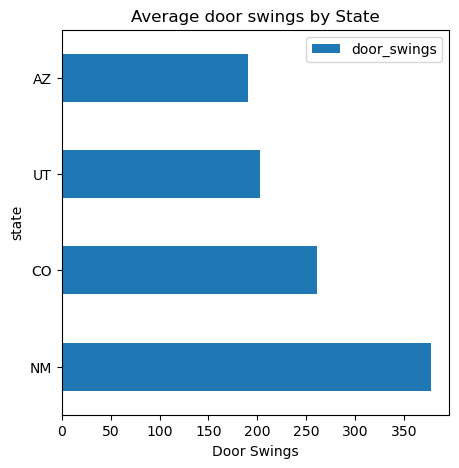

In [16]:
(state_mean_doorswings.reindex(index=state_mean_doorswings.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(5, 5), title='Average door swings by State'))
plt.xlabel('Door Swings');

In [17]:
ds = pd.melt(df[['state', 'door_swings']], 
                        id_vars='state', 
                        var_name='Traffic', 
                        value_vars=['door_swings'], 
                        value_name='Amount of Door Swings')

In [18]:
ds.head()

,state,Traffic,Amount of Door Swings
0,NM,door_swings,656
1,CO,door_swings,452
2,CO,door_swings,562
3,CO,door_swings,594
4,CO,door_swings,369


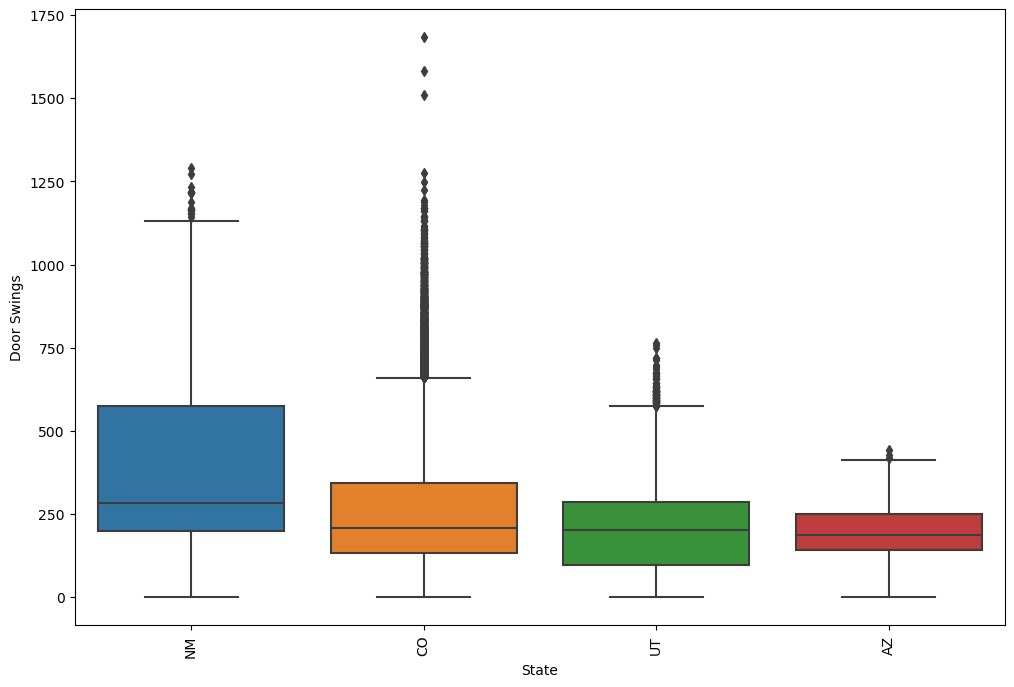

In [19]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Amount of Door Swings', data=ds)
plt.xticks(rotation='vertical')
plt.ylabel('Door Swings')
plt.xlabel('State');

It is interesting to see that NM has the highest amount of door swings in a given day. 

### 1.5.4 Numeric Features

#### 1.5.4.1 Numeric Data Summary

In [20]:
df.describe()

,door_swings
count,74789.000000
mean,253.804129
std,177.083237
min,0.000000
25%,131.000000
50%,214.000000
75%,328.000000
max,1683.000000


It is interesting to see that we had a store have over 1200 customers go into a store in one given day.

In [21]:
df.groupby(pd.Grouper(key='date', freq='1Y')).sum().head(10)

,door_swings
date,
2014-12-31,32174
2015-12-31,1275108
2016-12-31,1301189
2017-12-31,1602200
2018-12-31,2321143
2019-12-31,3203486
2020-12-31,3249148
2021-12-31,3145370
2022-12-31,2851939


Interestingly, our door swings increased from 2019 to 2020 when the pandemic was at its height.